In [1]:
from rnncomp.dataman import *
from rnncomp.augman import *
from rnncomp.constants import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
sig_list, desc = mk_cls_dataset(t_len=1, dims=1, n_classes=3, freq=5, class_type="disc_spec", save_dir=None)
print(sig_list.shape)
print(desc)
dat = sig_list[0][0][0]
print(dat.shape)

(3, 1, 1, 1000)
{'dims': 1, 'SEED': 0, 'class_type': 'disc_spec', 'n_classes': 3, 't_len': 1}
(1000,)


In [3]:
title_list = []
res_list = []

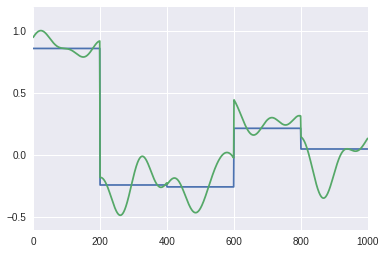

In [4]:
res = add_rand_noise(dat, dat.shape[0]*dt)
res_list.append(res)
title_list.append("Adding White Noise signal")

plt.plot(dat)
plt.plot(res)

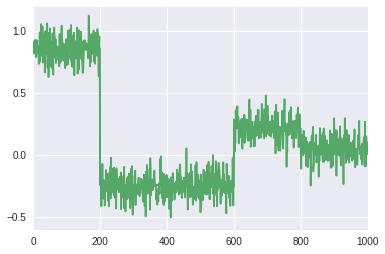

In [5]:
res = add_rand_noise(dat, dat.shape[0]*dt, scale=0.003, sig=False)
res_list.append(res)
title_list.append("Adding White Noise")

plt.plot(dat)
plt.plot(res)

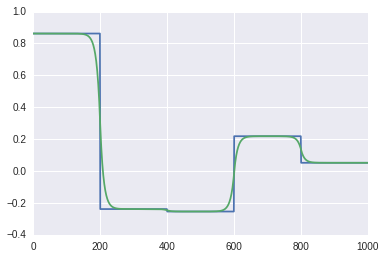

In [6]:
import nengo

res = nengo.Lowpass(0.01).filtfilt(dat)
res_list.append(res)
title_list.append("Filter with low-pass filter")

plt.plot(dat)
plt.plot(res)

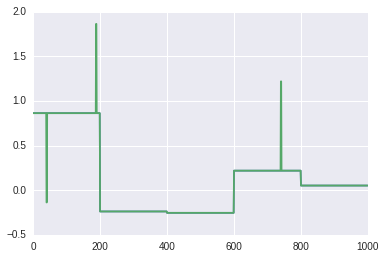

In [7]:
res = shot_noise(dat, dat.shape[0]*dt)
res_list.append(res)
title_list.append("Adding Shot Noise")

plt.plot(dat)
plt.plot(res)

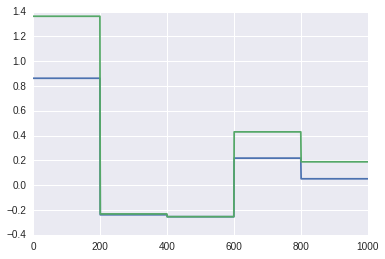

In [8]:
res = offset(dat, scale=0.5)
res_list.append(res)
title_list.append("Scalar shift")

plt.plot(dat)
plt.plot(res)

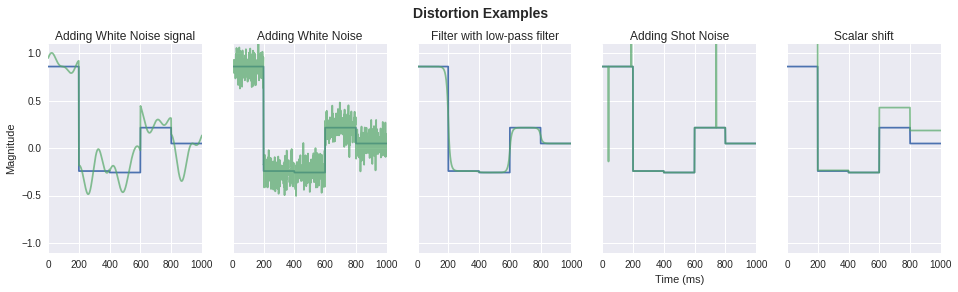

In [11]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(16,4))

for di, res in enumerate(res_list):
    axes[di].plot(dat)
    axes[di].plot(res, alpha=0.7)

    axes[di].set_title(title_list[di])
    axes[di].set_ylim((-1.1, 1.1))

fig.suptitle("Distortion Examples", fontsize=14, fontweight="bold")
fig.subplots_adjust(top=0.85)
axes[0].set_ylabel("Magnitude")
axes[3].set_xlabel("Time (ms)")
plt.savefig("noises.pdf", format="pdf")